In [1]:
# Upper Confidence Bound

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import os
import math
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importing the dataset
cwd = Path.cwd() / "datasets"
dataset = pd.read_csv(os.path.join(cwd, 'Ads_CTR_Optimisation.csv'))

In [3]:
# Implenting Upper Confidence Bound (UCB)
N = 10000
d = 10
ads_selected = []   # for all 10000 rounds of transactions
numbers_of_selections = [0] * d
sums_of_rewards = [0] * d
total_rewards = 0
for n in range(0, N):
    ad = 0
    max_UB = 0
    # i for loop to select the ad which has the maximum upper bound
    for i in range(0, d):
        if (numbers_of_selections[i] > 0):
            average_reward = sums_of_rewards[i] / numbers_of_selections[i]  # Step 1
            delta_i = math.sqrt(3/2 * math.log(n + 1) / numbers_of_selections[i])  # Step 2
            upper_bound = average_reward + delta_i  # Step 3
        else:
            upper_bound = 1e400
        if upper_bound > max_UB:
            max_UB = upper_bound
            ad = i

    ads_selected.append(ad)
    numbers_of_selections[ad] = numbers_of_selections[ad] + 1
    reward = dataset.values[n, ad]
    sums_of_rewards[ad] = sums_of_rewards[ad] + reward
    total_rewards = total_rewards + reward

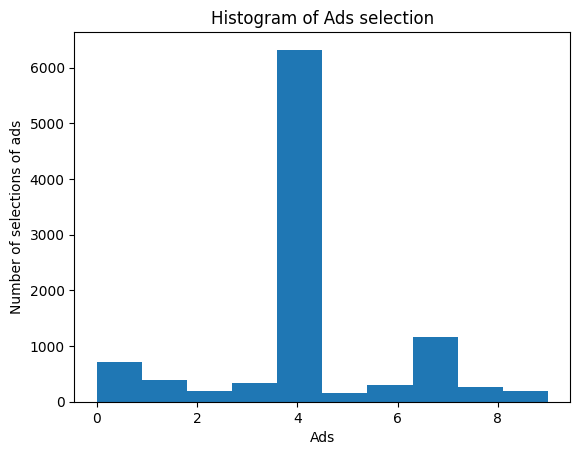

In [4]:
plt.hist(ads_selected)
plt.title('Histogram of Ads selection')
plt.xlabel('Ads')
plt.ylabel('Number of selections of ads')
plt.show()

In [5]:
# using random selection of ads in the entire 10000 rounds
import random
N = 10000
d = 10
ads_selected = []   # for all 10000 rounds of transactions
total_rewards = 0
for n in range(1, N):
    ad = random.randrange(d)
    reward = dataset.values[n, ad]
    ads_selected.append(ad)
    total_rewards = total_rewards + reward

In [6]:
ads_selected[:10]

[0, 6, 8, 8, 2, 7, 2, 7, 6, 0]

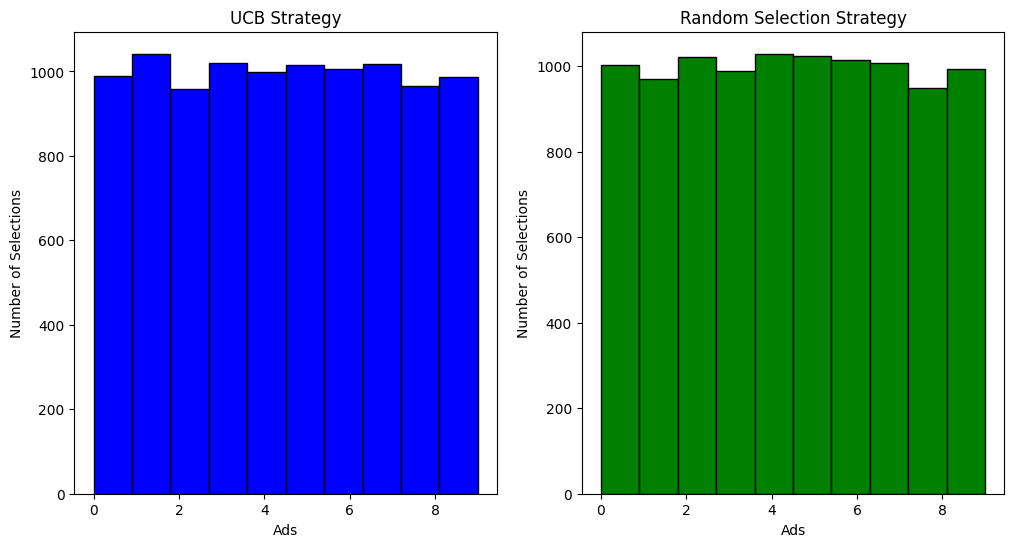

Total Rewards - UCB Strategy: 1290
Total Rewards - Random Selection Strategy: 1232


In [7]:
# Visualize the results

# UCB strategy
plt.figure(figsize=(12, 6))

# Plot the histogram for UCB strategy
plt.subplot(1, 2, 1)
plt.hist(ads_selected, bins=d, color='blue', edgecolor='black')
plt.title('UCB Strategy')
plt.xlabel('Ads')
plt.ylabel('Number of Selections')

# Random selection strategy
# Reset variables for random strategy
ads_selected_random = []
total_rewards_random = 0

# Implement random selection for comparison
for n in range(1, N):
    ad_random = random.randrange(d)
    reward_random = dataset.values[n, ad_random]
    ads_selected_random.append(ad_random)
    total_rewards_random += reward_random

# Plot the histogram for random strategy
plt.subplot(1, 2, 2)
plt.hist(ads_selected_random, bins=d, color='green', edgecolor='black')
plt.title('Random Selection Strategy')
plt.xlabel('Ads')
plt.ylabel('Number of Selections')

plt.show()

# Compare total rewards
print("Total Rewards - UCB Strategy:", total_rewards)
print("Total Rewards - Random Selection Strategy:", total_rewards_random)
